### Assignment of Clusstering Anaysis:
##Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('EastWestAirlines.csv')

# Check for missing values
print("Missing Values Count:")
print(df.isnull().sum())



Missing Values Count:
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [3]:
# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)  # Replace with mean OR
# df.fillna(df.median(), inplace=True)  # Replace with median
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.dropna(inplace=True)  # Drop rows with missing values



In [5]:
# Remove outliers (if any)
# Use IQR method or Z-score method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]



In [6]:
# Scale features using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Perform exploratory data analysis (EDA)
print("Data Description:")
print(df_scaled.describe())


Data Description:
               ID#       Balance  Qual_miles     cc1_miles  cc2_miles  \
count  2875.000000  2.875000e+03      2875.0  2.875000e+03     2875.0   
mean      0.000000 -7.908650e-17         0.0 -7.908650e-17        0.0   
std       1.000174  1.000174e+00         0.0  1.000174e+00        0.0   
min      -1.834643 -1.098253e+00         0.0 -7.190547e-01        0.0   
25%      -0.852984 -7.408945e-01         0.0 -7.190547e-01        0.0   
50%       0.046183 -3.171815e-01         0.0 -7.190547e-01        0.0   
75%       0.857648  4.492551e-01         0.0  1.013789e+00        0.0   
max       1.656087  3.656806e+00         0.0  2.746632e+00        0.0   

       cc3_miles   Bonus_miles   Bonus_trans  Flight_miles_12mo  \
count     2875.0  2.875000e+03  2.875000e+03       2.875000e+03   
mean         0.0 -5.931487e-17  8.402940e-17       1.482872e-17   
std          0.0  1.000174e+00  1.000174e+00       1.000174e+00   
min          0.0 -7.958670e-01 -1.210728e+00      -3.788

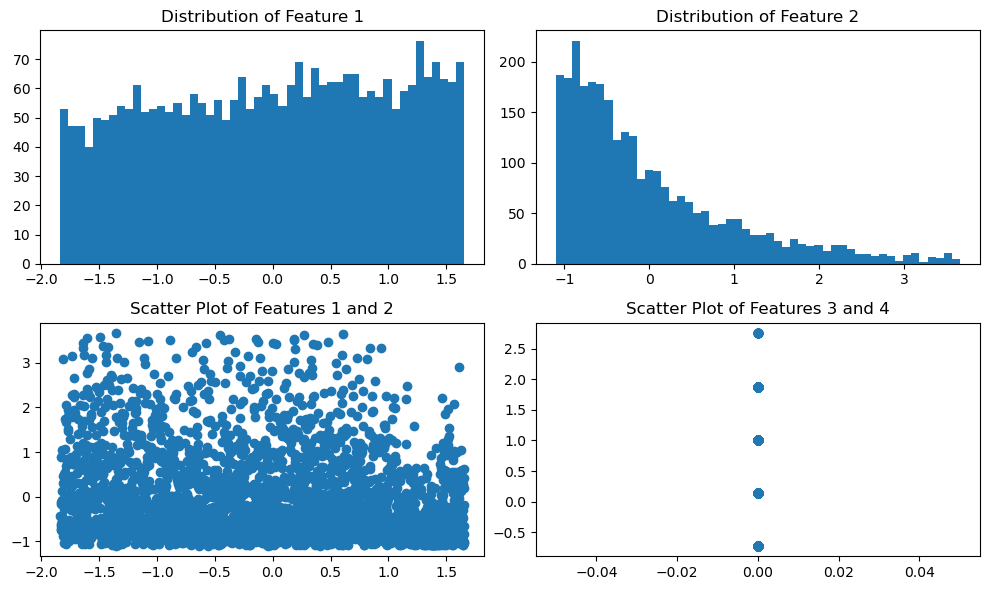

In [7]:


# Visualize data distribution
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(df_scaled.iloc[:, 0], bins=50)
plt.title('Distribution of Feature 1')

plt.subplot(2, 2, 2)
plt.hist(df_scaled.iloc[:, 1], bins=50)
plt.title('Distribution of Feature 2')

plt.subplot(2, 2, 3)
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1])
plt.title('Scatter Plot of Features 1 and 2')

plt.subplot(2, 2, 4)
plt.scatter(df_scaled.iloc[:, 2], df_scaled.iloc[:, 3])
plt.title('Scatter Plot of Features 3 and 4')

plt.tight_layout()
plt.show()

# Save preprocessed data
df_scaled.to_csv('EastWestAirlines_preprocessed.csv', index=False)

### Task 2: Implementing Clustering Algorithms:

K-Means: Silhouette Score = 0.254


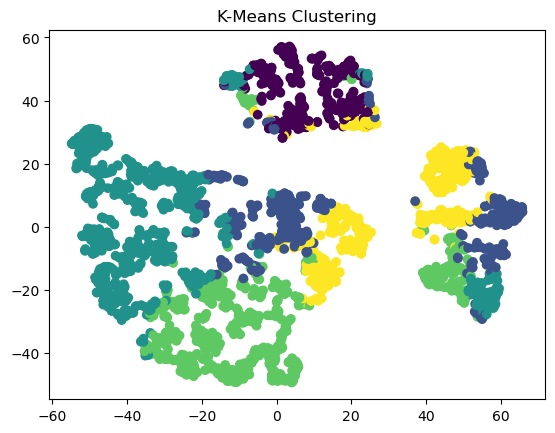

Hierarchical: Silhouette Score = 0.230


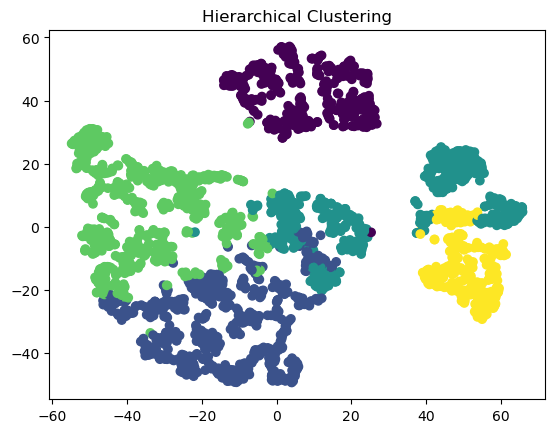

DBSCAN: Silhouette Score = -0.332


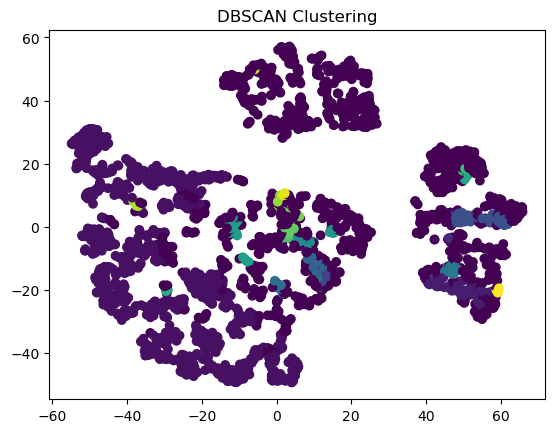

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load preprocessed data
df = pd.read_csv('EastWestAirlines_preprocessed.csv')

# Define clustering algorithms
algorithms = {
    'K-Means': KMeans(n_clusters=5),
    'Hierarchical': AgglomerativeClustering(n_clusters=5, linkage='ward'),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

# Apply clustering algorithms
for name, algorithm in algorithms.items():
    algorithm.fit(df)
    labels = algorithm.labels_
    score = silhouette_score(df, labels)
    print(f"{name}: Silhouette Score = {score:.3f}")

    # Visualize clusters using TSNE
    tsne = TSNE(n_components=2)
    df_tsne = tsne.fit_transform(df)
    plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=labels, cmap='viridis')
    plt.title(f"{name} Clustering")
    plt.show()

### Task 3 : Cluster Analysis and Interpretation:

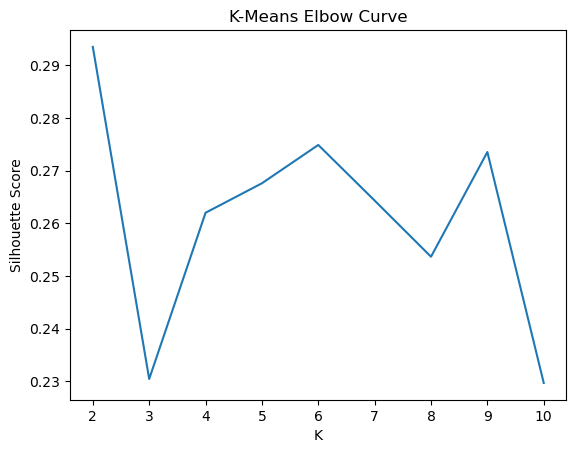

In [11]:
# Experiment with different K values
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    labels = kmeans.labels_
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

plt.plot(k_values, silhouette_scores)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('K-Means Elbow Curve')
plt.show()

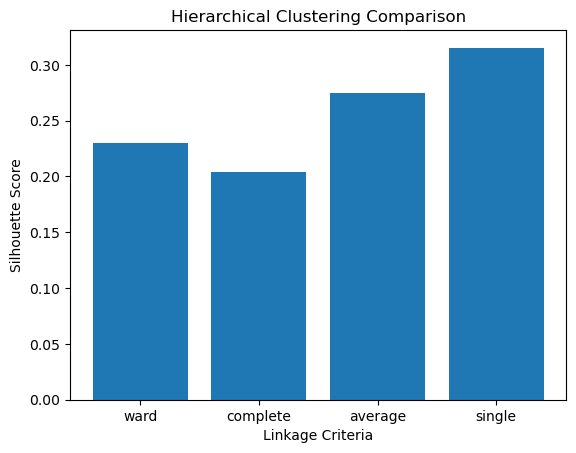

In [12]:
# Experiment with different linkage criteria
linkage_criteria = ['ward', 'complete', 'average', 'single']
silhouette_scores = []
for linkage in linkage_criteria:
    hierarchical = AgglomerativeClustering(n_clusters=5, linkage=linkage)
    hierarchical.fit(df)
    labels = hierarchical.labels_
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

plt.bar(linkage_criteria, silhouette_scores)
plt.xlabel('Linkage Criteria')
plt.ylabel('Silhouette Score')
plt.title('Hierarchical Clustering Comparison')
plt.show()

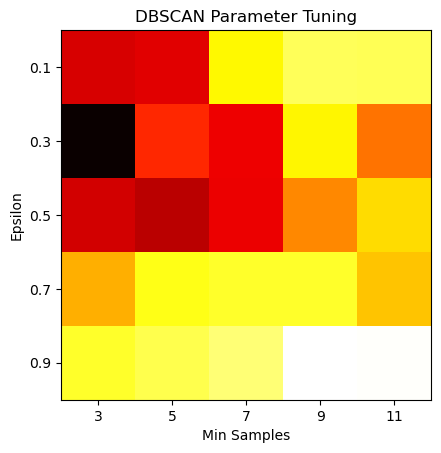

In [13]:
## DBSCAN
eps_values = [0.1, 0.3, 0.5, 0.7, 0.9]
min_samples_values = [3, 5, 7, 9, 11]
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(df)
        labels = dbscan.labels_
        score = silhouette_score(df, labels)
        silhouette_scores[i, j] = score

plt.imshow(silhouette_scores, cmap='hot', interpolation='nearest')
plt.xlabel('Min Samples')
plt.ylabel('Epsilon')
plt.xticks(range(len(min_samples_values)), min_samples_values)
plt.yticks(range(len(eps_values)), eps_values)
plt.title('DBSCAN Parameter Tuning')
plt.show()